# Import the Libraries

In [25]:
# Importing the libraries and setting global parameters for plotting
import pandas as pd
import numpy as np
# pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
# plt.style.use('seaborn')
print("Setup Complete")

Setup Complete


In [2]:
match_df = pd.read_csv('Matches (2).csv')

In [3]:
type(match_df)

pandas.core.frame.DataFrame

In [26]:
# Check first few records from the dataset
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [5]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
match_df.shape # (756-rows, 18-columns) tuple

(756, 18)

In [7]:
match_df.size

13608

In [8]:
type(match_df[['season','winner','id']].groupby(['season','winner']).size())

pandas.core.series.Series

In [9]:
match_df[['season','winner','id']].groupby(['season','winner']).size()

season  winner                     
2008    Chennai Super Kings             9
        Deccan Chargers                 2
        Delhi Daredevils                7
        Kings XI Punjab                10
        Kolkata Knight Riders           6
                                       ..
2019    Kolkata Knight Riders           6
        Mumbai Indians                 11
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
        Sunrisers Hyderabad             6
Length: 100, dtype: int64

In [10]:
match_df.shape

(756, 18)

In [11]:
# Summary of games won by each team per season
summary_df = match_df[['season','winner']].groupby(['season','winner']).size().reset_index(name = "No.of games won")

In [12]:
summary_df.head(10)

,season,winner,No.of games won
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6
5,2008,Mumbai Indians,7
6,2008,Rajasthan Royals,13
7,2008,Royal Challengers Bangalore,4
8,2009,Chennai Super Kings,8
9,2009,Deccan Chargers,9


In [13]:
type(summary_df)

pandas.core.frame.DataFrame

In [28]:
# type(summary_df.reset_index())

In [29]:
# # resetting index to generate a new DataFrame
# summary_df = summary_df.reset_index(name='No.of games won')

In [14]:
summary_df.columns

Index(['season', 'winner', 'No.of games won'], dtype='object')

In [15]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           100 non-null    int64 
 1   winner           100 non-null    object
 2   No.of games won  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


# Summary no. of matches won by Chennai per season

In [34]:
chennai_winning_summary_df = summary_df[summary_df['winner'] == 'Chennai Super Kings']

In [35]:
chennai_winning_summary_df

,season,winner,No.of games won
0,2008,Chennai Super Kings,9
8,2009,Chennai Super Kings,8
16,2010,Chennai Super Kings,9
24,2011,Chennai Super Kings,11
34,2012,Chennai Super Kings,10
43,2013,Chennai Super Kings,12
52,2014,Chennai Super Kings,10
60,2015,Chennai Super Kings,10
84,2018,Chennai Super Kings,11
92,2019,Chennai Super Kings,10


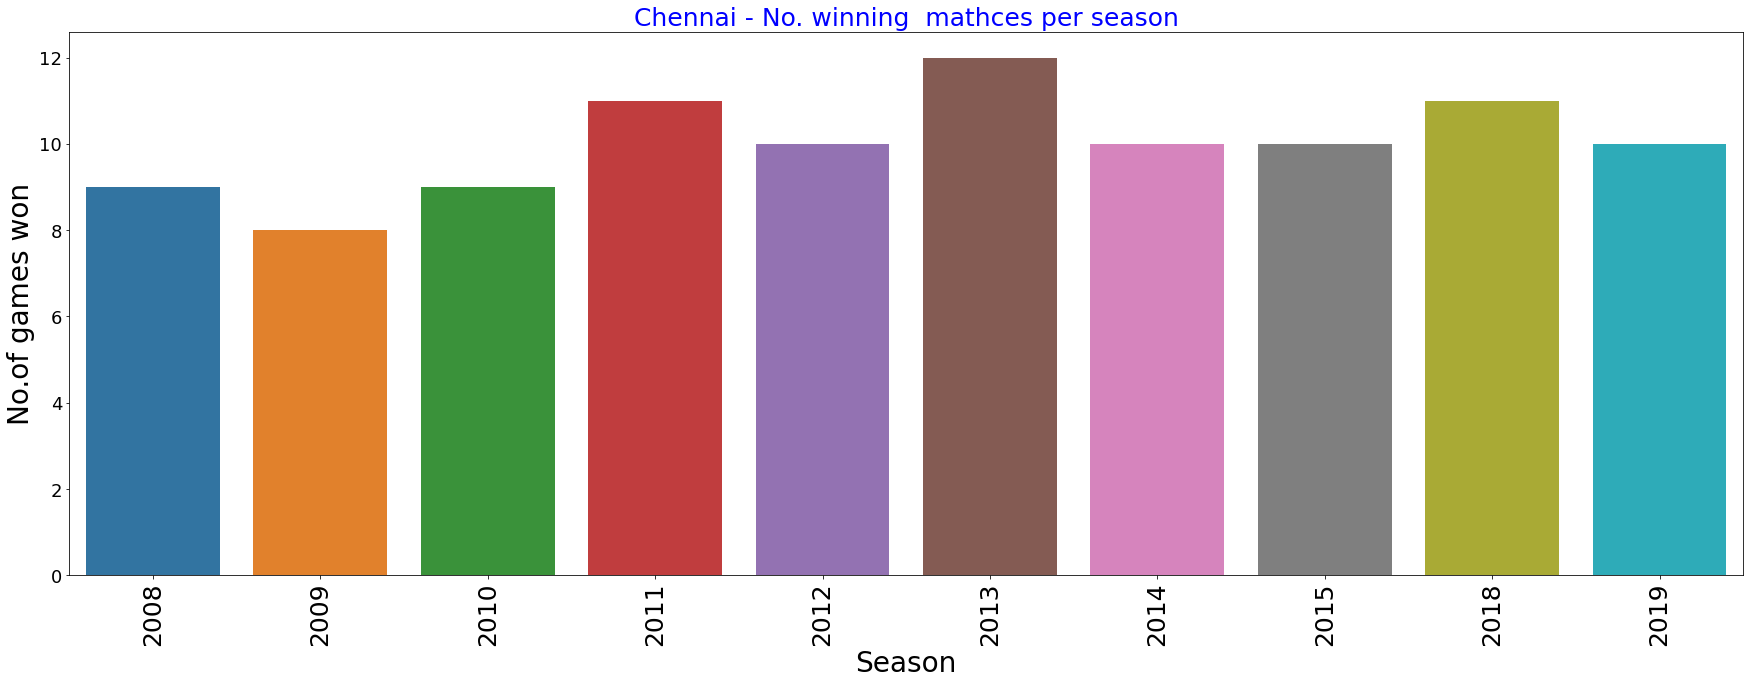

In [18]:
# Set the width and height of the figure
plt.figure(figsize = (30,10))

# Add title
plt.title("Chennai - No. winning  mathces per season",
          color='b',
          fontsize = 25)

# Create the bar chart
sns.barplot(x = chennai_winning_summary_df['season'],
            y = chennai_winning_summary_df['No.of games won'])

# Add label for vertical axis
plt.xticks(rotation = 90,fontsize=25)
plt.yticks(fontsize=18)
plt.xlabel("Season",fontsize=28)
plt.ylabel("No.of games won",fontsize=28);

# Dataset

In [19]:
match_df.shape

(756, 18)

In [20]:
# Get only Chennai matches from the dataset - only considering team 1
chennai_match_df = match_df[match_df['team1'] == 'Chennai Super Kings']

In [21]:
chennai_match_df.shape

(89, 18)

In [22]:
chennai_match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
7,67,2008,Chennai,23-04-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
14,74,2008,Bangalore,28-04-2008,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
19,79,2008,Chennai,02-05-2008,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
23,83,2008,Jaipur,04-05-2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN


# Impact of toss on their win percentage.

## Chennai won the toss

### Chennai won toss and won match

In [23]:
chennai_won_toss_won_match = chennai_match_df[(chennai_match_df['toss_winner']=='Chennai Super Kings') & (chennai_match_df['winner']=='Chennai Super Kings')]
chennai_won_toss_won_match.shape

(30, 18)

In [24]:
chennai_won_toss_won_match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
14,74,2008,Bangalore,28-04-2008,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN


In [55]:
print(chennai_won_toss_won_match.shape[0])
print(chennai_match_df.shape[0])

30
89


In [56]:
win_percentage =  (chennai_won_toss_won_match.shape[0] / chennai_match_df.shape[0]) * 100

print(f"Chennai win % when they win toss is {win_percentage:.2f} %")

Chennai win % when they win toss is 33.71 %


In [49]:
30/89

0.33707865168539325

In [33]:
# # no. of matches out of toss wins
# (chennai_won_toss_won_match.shape[0]/won_toss.shape[0]) * 100

### Chennai lost toss and won match

In [58]:
chennai_lost_toss_won_match = chennai_match_df[(chennai_match_df['toss_winner'] != 'Chennai Super Kings') & (chennai_match_df['winner'] == 'Chennai Super Kings')]
chennai_lost_toss_won_match.shape

(21, 18)

In [59]:
chennai_match_df.shape

(89, 18)

In [60]:
chennai_lost_toss_won_match = chennai_match_df[(chennai_match_df['toss_winner'] != 'Chennai Super Kings') & (chennai_match_df['winner'] == 'Chennai Super Kings')]
win_percentage =  (chennai_lost_toss_won_match.shape[0]/chennai_match_df.shape[0]) * 100
print(f"Chennai win % when they lose toss is {win_percentage:.2f} %")

Chennai win % when they lose toss is 23.60 %


# Impact of cities on their win percentage.

In [37]:
chennai_match_df.shape

(89, 18)

In [95]:
venue_df = chennai_match_df.copy()
venue_df.shape

(89, 18)

In [97]:
venue_df['city'].value_counts().reset_index()

,index,city
0,Chennai,34
1,Mumbai,6
2,Pune,5
3,Kolkata,5
4,Bangalore,4
5,Jaipur,4
6,Hyderabad,3
7,Centurion,3
8,Delhi,3
9,Ranchi,3


In [39]:
venue_df = venue_df['city'].value_counts().rename_axis('venue').reset_index(name='match_counts')
venue_df

,venue,match_counts
0,Chennai,34
1,Mumbai,6
2,Kolkata,5
3,Pune,5
4,Bangalore,4
5,Jaipur,4
6,Hyderabad,3
7,Delhi,3
8,Centurion,3
9,Ranchi,3


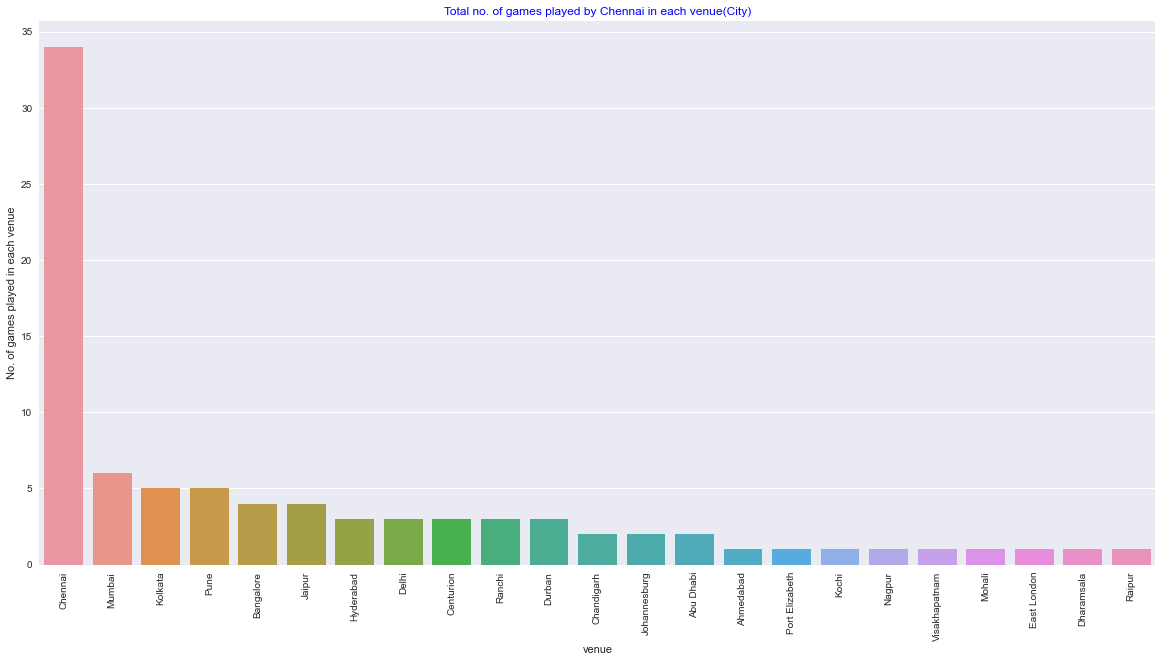

In [40]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Total no. of games played by Chennai in each venue(City)",color='b')

# BCreate the bar chart
sns.barplot(x=venue_df['venue'], y=venue_df['match_counts'])

# Add label for vertical axis
plt.ylabel("No. of games played in each venue")
plt.xticks(rotation = 'vertical');

In [41]:
chennai_match_df.shape

(89, 18)

In [42]:
venue_winning_df = chennai_match_df.copy()

In [43]:
chennai_winning_venue_df = venue_winning_df[venue_winning_df['winner']=='Chennai Super Kings']['city'].value_counts().rename_axis('winning_venue').reset_index(name='winning_match_counts')
chennai_winning_venue_df

,winning_venue,winning_match_counts
0,Chennai,26
1,Bangalore,3
2,Pune,3
3,Centurion,2
4,Delhi,2
5,Mumbai,2
6,Hyderabad,2
7,Ranchi,1
8,Visakhapatnam,1
9,Durban,1


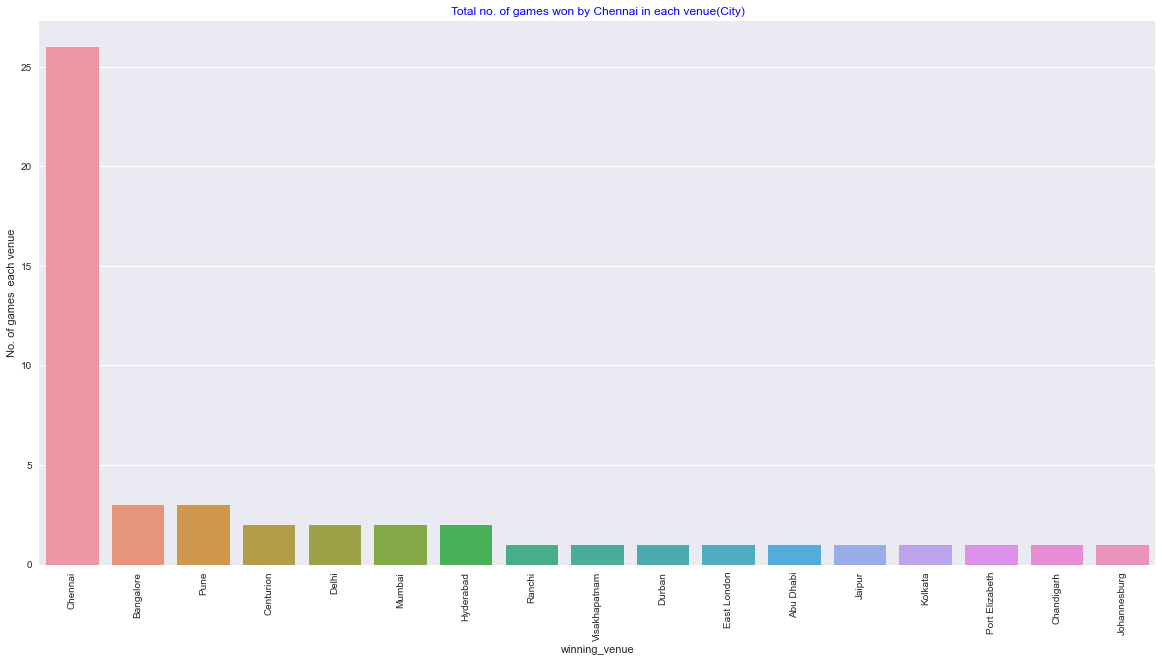

In [44]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Total no. of games won by Chennai in each venue(City)",color='b')

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=chennai_winning_venue_df['winning_venue'], y=chennai_winning_venue_df['winning_match_counts'])

# Add label for vertical axis
plt.ylabel("No. of games  each venue")
plt.xticks(rotation = 'vertical');

In [45]:
chennai_winning_final_df = pd.merge(venue_df,chennai_winning_venue_df,left_on = ['venue'],right_on = ['winning_venue'],
                                    how='left')
chennai_winning_final_df

,venue,match_counts,winning_venue,winning_match_counts
0,Chennai,34,Chennai,26.0
1,Mumbai,6,Mumbai,2.0
2,Kolkata,5,Kolkata,1.0
3,Pune,5,Pune,3.0
4,Bangalore,4,Bangalore,3.0
5,Jaipur,4,Jaipur,1.0
6,Hyderabad,3,Hyderabad,2.0
7,Delhi,3,Delhi,2.0
8,Centurion,3,Centurion,2.0
9,Ranchi,3,Ranchi,1.0


In [46]:
chennai_winning_final_df['winning_percentage'] = (chennai_winning_final_df['winning_match_counts'] / chennai_winning_final_df['match_counts']) * 100

In [47]:
# merging 2 dfs to get the final winning % result
chennai_winning_final_df['winning_match_counts'].fillna(0,inplace=True)
chennai_winning_final_df.head(20)

,venue,match_counts,winning_venue,winning_match_counts,winning_percentage
0,Chennai,34,Chennai,26.0,76.470588
1,Mumbai,6,Mumbai,2.0,33.333333
2,Kolkata,5,Kolkata,1.0,20.000000
3,Pune,5,Pune,3.0,60.000000
4,Bangalore,4,Bangalore,3.0,75.000000
5,Jaipur,4,Jaipur,1.0,25.000000
6,Hyderabad,3,Hyderabad,2.0,66.666667
7,Delhi,3,Delhi,2.0,66.666667
8,Centurion,3,Centurion,2.0,66.666667
9,Ranchi,3,Ranchi,1.0,33.333333


In [48]:
chennai_winning_final_df[['venue', 'match_counts', 'winning_percentage']]

,venue,match_counts,winning_percentage
0,Chennai,34,76.470588
1,Mumbai,6,33.333333
2,Kolkata,5,20.000000
3,Pune,5,60.000000
4,Bangalore,4,75.000000
5,Jaipur,4,25.000000
6,Hyderabad,3,66.666667
7,Delhi,3,66.666667
8,Centurion,3,66.666667
9,Ranchi,3,33.333333


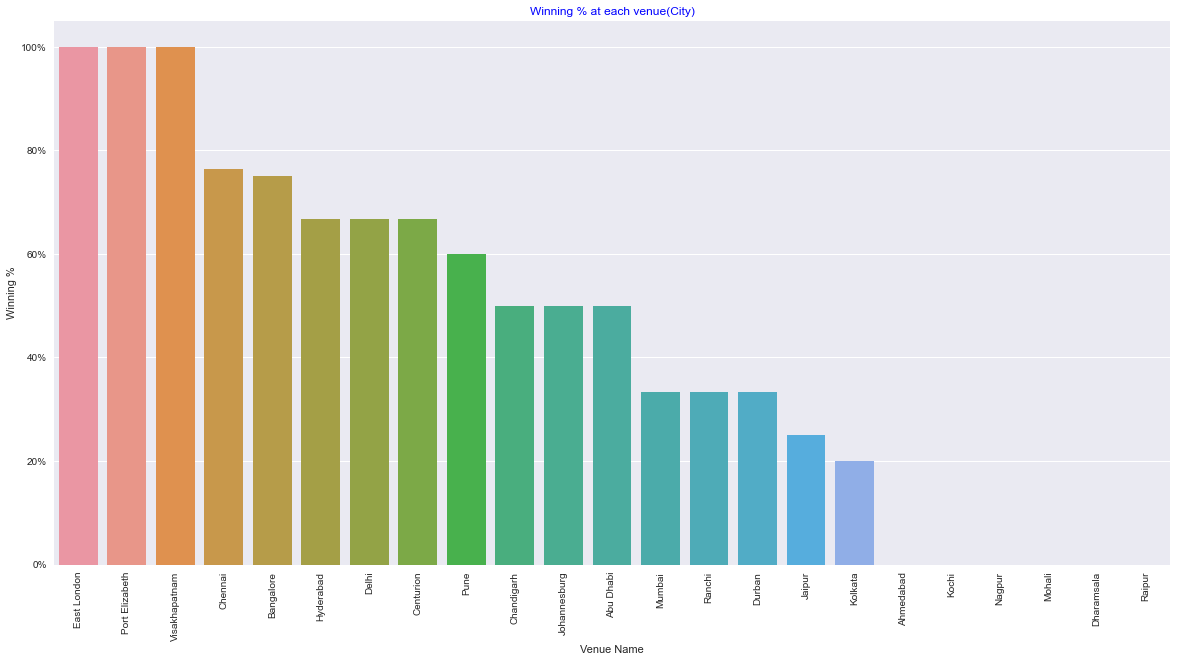

In [49]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Winning % at each venue(City)",color='b')

# Create the bar chart
sns.barplot(x=chennai_winning_final_df['venue'], 
            y=chennai_winning_final_df['winning_percentage'],
            order=chennai_winning_final_df.sort_values('winning_percentage',ascending = False).venue)

# Add label for vertical axis
plt.ylabel("Winning %")
plt.xlabel("Venue Name")
plt.xticks(rotation = 'vertical')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]);

# Who is their most impactful player against each team (man of the match).

In [50]:
chennai_winning_team_df = chennai_match_df[chennai_match_df['winner']=='Chennai Super Kings']
chennai_winning_team_df.shape

(51, 18)

In [51]:
chennai_winning_team_as_playing_team1_df = chennai_winning_team_df[chennai_winning_team_df['team1'] == 'Chennai Super Kings'].groupby(['team2','player_of_match','win_by_runs']).size().reset_index()
chennai_winning_team_as_playing_team1_df.head(10)

,team2,player_of_match,win_by_runs,0
0,Deccan Chargers,DE Bollinger,38,1
1,Deccan Chargers,JA Morkel,19,1
2,Deccan Chargers,MS Dhoni,78,1
3,Deccan Chargers,RA Jadeja,74,1
4,Deccan Chargers,SK Raina,10,1
5,Delhi Capitals,MS Dhoni,80,1
6,Delhi Daredevils,A Nehra,1,1
7,Delhi Daredevils,M Vijay,86,1
8,Delhi Daredevils,MEK Hussey,86,1
9,Delhi Daredevils,MS Dhoni,18,1


In [52]:
chennai_winning_team_as_playing_team1_df.columns = ['opposite_team','player_of_match','win_by_runs','no_times_won_as_player_of_match']
chennai_winning_team_as_playing_team1_df.head(10)

,opposite_team,player_of_match,win_by_runs,no_times_won_as_player_of_match
0,Deccan Chargers,DE Bollinger,38,1
1,Deccan Chargers,JA Morkel,19,1
2,Deccan Chargers,MS Dhoni,78,1
3,Deccan Chargers,RA Jadeja,74,1
4,Deccan Chargers,SK Raina,10,1
5,Delhi Capitals,MS Dhoni,80,1
6,Delhi Daredevils,A Nehra,1,1
7,Delhi Daredevils,M Vijay,86,1
8,Delhi Daredevils,MEK Hussey,86,1
9,Delhi Daredevils,MS Dhoni,18,1


In [53]:
impactful_player_df = chennai_winning_team_as_playing_team1_df.copy()
impactful_player_df = impactful_player_df.groupby(['opposite_team','player_of_match','win_by_runs']).no_times_won_as_player_of_match.agg([sum]).reset_index()
impactful_player_df.head()

,opposite_team,player_of_match,win_by_runs,sum
0,Deccan Chargers,DE Bollinger,38,1
1,Deccan Chargers,JA Morkel,19,1
2,Deccan Chargers,MS Dhoni,78,1
3,Deccan Chargers,RA Jadeja,74,1
4,Deccan Chargers,SK Raina,10,1


In [54]:
impactful_player_df.sort_values(by=['sum'],ascending = False,inplace=True)
impactful_player_df.reset_index(inplace=True,drop=True)

In [55]:
impactful_player_df.columns = ['opposite_team','player_of_match','win_by_runs','No.of times won MOM']

In [56]:
impactful_player_df['opposite_team'].unique()

array(['Deccan Chargers', 'Rajasthan Royals', 'Mumbai Indians',
       'Pune Warriors', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Delhi Daredevils', 'Delhi Capitals', 'Kings XI Punjab',
       'Kochi Tuskers Kerala'], dtype=object)

### Top impactful players for CSK of all seasons

In [57]:
impactful_player_all_time_df = impactful_player_df.groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_all_time_df.sort_values('No.of times won MOM',ascending=False)

,player_of_match,win_by_runs,No.of times won MOM
17,SK Raina,330,9
13,MS Dhoni,360,9
11,MEK Hussey,227,6
10,M Vijay,230,4
14,RA Jadeja,127,4
2,BB McCullum,142,2
18,SR Watson,77,2
9,M Muralitharan,116,2
12,ML Hayden,18,2
16,SB Jakati,18,1


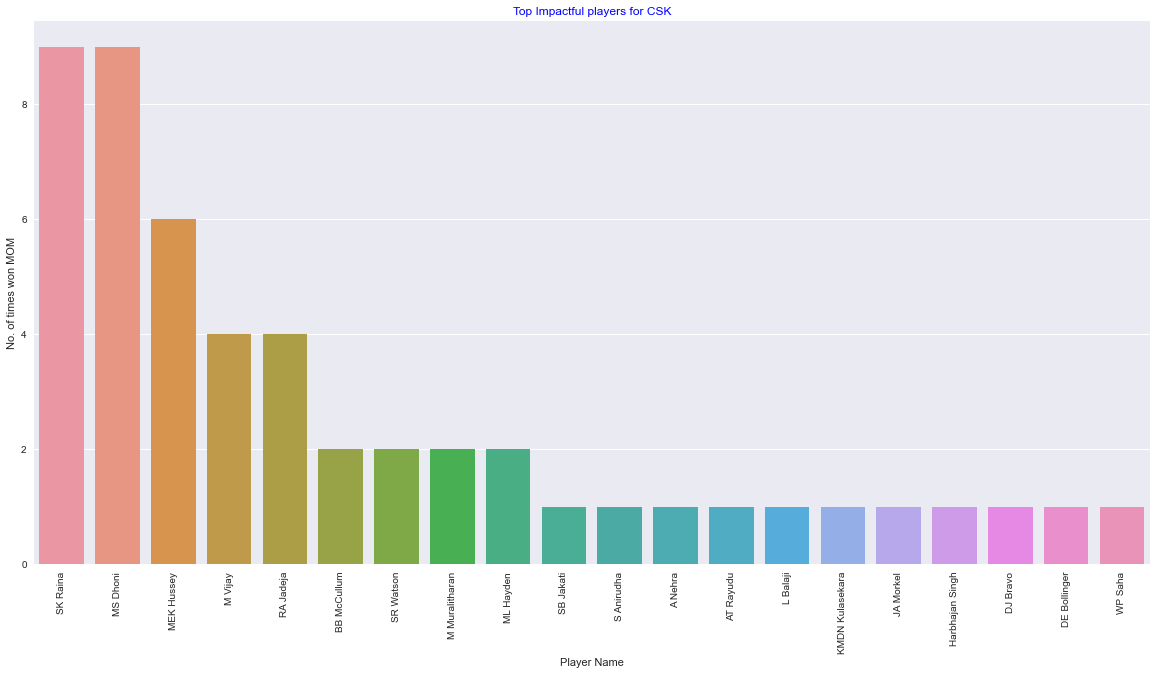

In [58]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Top Impactful players for CSK",color='b')

# Create the bar chart
sns.barplot(x=impactful_player_all_time_df['player_of_match'], 
            y=impactful_player_all_time_df['No.of times won MOM'],
            order=impactful_player_all_time_df.sort_values('No.of times won MOM',ascending = False).player_of_match)

# Add label for vertical axis
plt.ylabel("No. of times won MOM")
plt.xlabel("Player Name")
plt.xticks(rotation = 'vertical');

### Impactful player against RCB

In [59]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Royal Challengers Bangalore']

,opposite_team,player_of_match,win_by_runs,No.of times won MOM
16,Royal Challengers Bangalore,M Muralitharan,92,1
17,Royal Challengers Bangalore,M Vijay,58,1
18,Royal Challengers Bangalore,MEK Hussey,21,1
19,Royal Challengers Bangalore,MS Dhoni,13,1
20,Royal Challengers Bangalore,SK Raina,24,1
21,Royal Challengers Bangalore,SK Raina,27,1


In [60]:
impactful_player_against_banglore_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Royal Challengers Bangalore'].groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_against_banglore_df.reset_index(inplace=True,drop=True)

In [61]:
impactful_player_against_banglore_df.sort_values('No.of times won MOM',ascending=False)

,player_of_match,win_by_runs,No.of times won MOM
4,SK Raina,51,2
0,M Muralitharan,92,1
1,M Vijay,58,1
2,MEK Hussey,21,1
3,MS Dhoni,13,1


### Impactful player against MI

In [62]:
impactful_player_against_MI_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Mumbai Indians'].groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_against_MI_df.reset_index(inplace=True,drop=True)

In [63]:
impactful_player_against_MI_df.sort_values('No.of times won MOM',ascending=False)

,player_of_match,win_by_runs,No.of times won MOM
3,SK Raina,46,2
0,MEK Hussey,48,1
1,ML Hayden,6,1
2,MS Dhoni,38,1


### Impactful player against Delhi Daredevils

In [64]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Delhi Daredevils']

,opposite_team,player_of_match,win_by_runs,No.of times won MOM
27,Delhi Daredevils,SK Raina,93,1
32,Delhi Daredevils,A Nehra,1,1
33,Delhi Daredevils,M Vijay,86,1
34,Delhi Daredevils,MEK Hussey,86,1
35,Delhi Daredevils,MS Dhoni,18,1
36,Delhi Daredevils,MS Dhoni,33,1
37,Delhi Daredevils,SB Jakati,18,1
38,Delhi Daredevils,SR Watson,13,1


In [65]:
impactful_player_against_DD_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Delhi Daredevils'].groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_against_DD_df.reset_index(inplace=True,drop=True)

In [66]:
impactful_player_against_DD_df.sort_values('No.of times won MOM',ascending=False)

,player_of_match,win_by_runs,No.of times won MOM
3,MS Dhoni,51,2
0,A Nehra,1,1
1,M Vijay,86,1
2,MEK Hussey,86,1
4,SB Jakati,18,1
5,SK Raina,93,1
6,SR Watson,13,1


### Impactful player against Rajasthan Royals

In [67]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Rajasthan Royals']

,opposite_team,player_of_match,win_by_runs,No.of times won MOM
1,Rajasthan Royals,RA Jadeja,7,1
9,Rajasthan Royals,M Vijay,23,1
10,Rajasthan Royals,M Vijay,63,1
11,Rajasthan Royals,MS Dhoni,8,1
12,Rajasthan Royals,RA Jadeja,12,1
14,Rajasthan Royals,SK Raina,38,1
15,Rajasthan Royals,SR Watson,64,1


In [68]:
impactful_player_against_RR_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Rajasthan Royals'].groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_against_RR_df.reset_index(inplace=True,drop=True)

In [69]:
impactful_player_against_RR_df.sort_values('No.of times won MOM',ascending=False)

,player_of_match,win_by_runs,No.of times won MOM
0,M Vijay,86,2
2,RA Jadeja,19,2
1,MS Dhoni,8,1
3,SK Raina,38,1
4,SR Watson,64,1


### Impactful player against Deccan Chargers

In [70]:
impactful_player_df[impactful_player_df['opposite_team'] =='Deccan Chargers']

,opposite_team,player_of_match,win_by_runs,No.of times won MOM
0,Deccan Chargers,DE Bollinger,38,1
26,Deccan Chargers,JA Morkel,19,1
28,Deccan Chargers,MS Dhoni,78,1
29,Deccan Chargers,RA Jadeja,74,1
30,Deccan Chargers,SK Raina,10,1


In [71]:
impactful_player_against_DC_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Deccan Chargers'].groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_against_DC_df.reset_index(inplace=True,drop=True)

In [72]:
impactful_player_against_DC_df.sort_values(['No.of times won MOM','win_by_runs'],ascending=False)

,player_of_match,win_by_runs,No.of times won MOM
2,MS Dhoni,78,1
3,RA Jadeja,74,1
0,DE Bollinger,38,1
1,JA Morkel,19,1
4,SK Raina,10,1


### Impactful player against Pune Warriors

In [73]:
impactful_player_df[impactful_player_df['opposite_team'] =='Pune Warriors']

,opposite_team,player_of_match,win_by_runs,No.of times won MOM
6,Pune Warriors,KMDN Kulasekara,13,1
7,Pune Warriors,MEK Hussey,25,1
8,Pune Warriors,MS Dhoni,37,1


In [74]:
impactful_player_against_PW_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Pune Warriors'].groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_against_PW_df.reset_index(inplace=True,drop=True)

In [75]:
impactful_player_against_PW_df.sort_values(['No.of times won MOM','win_by_runs'],ascending=False)

,player_of_match,win_by_runs,No.of times won MOM
2,MS Dhoni,37,1
1,MEK Hussey,25,1
0,KMDN Kulasekara,13,1


### Impactful player against Kolkata Knight Riders

In [76]:
impactful_player_df[impactful_player_df['opposite_team'] =='Kolkata Knight Riders']

,opposite_team,player_of_match,win_by_runs,No.of times won MOM
13,Kolkata Knight Riders,S Anirudha,2,1
25,Kolkata Knight Riders,RA Jadeja,34,1
39,Kolkata Knight Riders,MS Dhoni,55,1
48,Kolkata Knight Riders,DJ Bravo,2,1
49,Kolkata Knight Riders,MEK Hussey,14,1


In [77]:
impactful_player_against_KKR_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Kolkata Knight Riders'].groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_against_KKR_df.reset_index(inplace=True,drop=True)

In [78]:
impactful_player_against_KKR_df.sort_values(['No.of times won MOM','win_by_runs'],ascending=False)

,player_of_match,win_by_runs,No.of times won MOM
2,MS Dhoni,55,1
3,RA Jadeja,34,1
1,MEK Hussey,14,1
0,DJ Bravo,2,1
4,S Anirudha,2,1


### Impactful player against Sunrisers Hyderabad

In [79]:
impactful_player_df[impactful_player_df['opposite_team'] =='Sunrisers Hyderabad']

,opposite_team,player_of_match,win_by_runs,No.of times won MOM
22,Sunrisers Hyderabad,AT Rayudu,4,1
23,Sunrisers Hyderabad,BB McCullum,45,1
50,Sunrisers Hyderabad,SK Raina,77,1


In [80]:
impactful_player_against_SH_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Sunrisers Hyderabad'].groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_against_SH_df.reset_index(inplace=True,drop=True)

In [81]:
impactful_player_against_SH_df.sort_values(['No.of times won MOM','win_by_runs'],ascending=False)

,player_of_match,win_by_runs,No.of times won MOM
2,SK Raina,77,1
1,BB McCullum,45,1
0,AT Rayudu,4,1


 ### Impactful player against Delhi Capitals

In [82]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Delhi Capitals']

,opposite_team,player_of_match,win_by_runs,No.of times won MOM
31,Delhi Capitals,MS Dhoni,80,1


### Impactful player against Kings XI Punjab

In [83]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Kings XI Punjab']

,opposite_team,player_of_match,win_by_runs,No.of times won MOM
40,Kings XI Punjab,BB McCullum,97,1
41,Kings XI Punjab,Harbhajan Singh,22,1
42,Kings XI Punjab,L Balaji,18,1
43,Kings XI Punjab,M Muralitharan,24,1
44,Kings XI Punjab,MEK Hussey,33,1
45,Kings XI Punjab,ML Hayden,12,1
46,Kings XI Punjab,SK Raina,15,1


In [84]:
impactful_player_against_KP_df = impactful_player_df[impactful_player_df['opposite_team'] == 'Kings XI Punjab'].groupby(['player_of_match']).aggregate('sum').reset_index()
impactful_player_against_KP_df.reset_index(inplace=True,drop=True)

In [85]:
impactful_player_against_KP_df.sort_values('No.of times won MOM',ascending=False)

,player_of_match,win_by_runs,No.of times won MOM
0,BB McCullum,97,1
1,Harbhajan Singh,22,1
2,L Balaji,18,1
3,M Muralitharan,24,1
4,MEK Hussey,33,1
5,ML Hayden,12,1
6,SK Raina,15,1


### Impactful player against Kochi Tuskers Kerala

In [86]:
impactful_player_df[impactful_player_df['opposite_team'] == 'Kochi Tuskers Kerala']

,opposite_team,player_of_match,win_by_runs,No.of times won MOM
47,Kochi Tuskers Kerala,WP Saha,11,1


# Which are the top most (3) difficult teams to beat.

In [87]:
chennai_match_df.shape

(89, 18)

In [88]:
total_matches_played_by_chennai = chennai_match_df.shape[0]

In [89]:
total_matches_lost_by_chennai = chennai_match_df[chennai_match_df['winner'] != 'Chennai Super Kings'].shape[0]

In [90]:
chennai_losing_percentage = (total_matches_lost_by_chennai/total_matches_played_by_chennai) * 100
print('Total matches played by Chennai',total_matches_played_by_chennai)
print('Total matches lost by Chennai',total_matches_lost_by_chennai)
print(f'Chennai overall losing percentage {chennai_losing_percentage:.2f} %')

Total matches played by Chennai 89
Total matches lost by Chennai 38
Chennai overall losing percentage 42.70 %


In [91]:
chennai_lost_match_df = chennai_match_df[chennai_match_df['winner']!='Chennai Super Kings']
chennai_lost_match_df.reset_index(inplace=True,drop=True)
chennai_lost_match_df.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,79,2008,Chennai,02-05-2008,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
1,83,2008,Jaipur,04-05-2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
2,85,2008,Chennai,06-05-2008,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,7,AC Gilchrist,"MA Chidambaram Stadium, Chepauk",MR Benson,RB Tiffin,NaN


In [92]:
chennai_lost_match_df.shape

(38, 18)

In [93]:
chennai_lost_match_df = chennai_lost_match_df.groupby('winner').size().reset_index(name = 'no_of_times_lost')
chennai_lost_match_df

,winner,no_of_times_lost
0,Deccan Chargers,3
1,Delhi Daredevils,4
2,Kings XI Punjab,4
3,Kochi Tuskers Kerala,1
4,Kolkata Knight Riders,7
5,Mumbai Indians,7
6,Pune Warriors,1
7,Rajasthan Royals,5
8,Royal Challengers Bangalore,4
9,Sunrisers Hyderabad,2


In [94]:
chennai_lost_match_df.columns = ['rival_team','no_of_times_lost']

In [95]:
chennai_lost_match_df.sort_values('no_of_times_lost',ascending=False)

,rival_team,no_of_times_lost
4,Kolkata Knight Riders,7
5,Mumbai Indians,7
7,Rajasthan Royals,5
1,Delhi Daredevils,4
2,Kings XI Punjab,4
8,Royal Challengers Bangalore,4
0,Deccan Chargers,3
9,Sunrisers Hyderabad,2
3,Kochi Tuskers Kerala,1
6,Pune Warriors,1


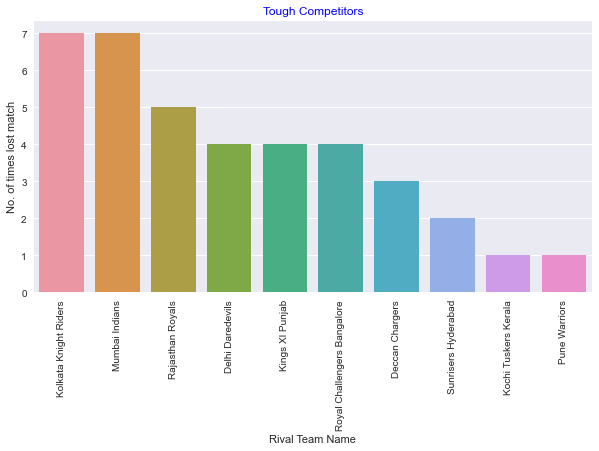

In [96]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Tough Competitors",color='b')

# Create the bar chart
sns.barplot(x=chennai_lost_match_df['rival_team'], 
            y=chennai_lost_match_df['no_of_times_lost'],
            order=chennai_lost_match_df.sort_values('no_of_times_lost',ascending = False).rival_team)

# Add label for vertical axis
plt.xlabel("Rival Team Name")
plt.ylabel("No. of times lost match")

plt.xticks(rotation = 'vertical');

# Impact of toss on their win percentage against the 3 most difficult teams to beat.

In [97]:
toss_winning_df = chennai_match_df.groupby(['team1','team2','toss_winner','toss_decision','winner']).size()

In [98]:
toss_winning_df  = toss_winning_df.reset_index()
toss_winning_df.head()

,team1,team2,toss_winner,toss_decision,winner,0
0,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,4
1,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Deccan Chargers,1
2,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Chennai Super Kings,1
3,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,2
4,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Chennai Super Kings,1


In [99]:
toss_winning_df.columns = ['team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'no_of_matches']
toss_winning_df.head()

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
0,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,4
1,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Deccan Chargers,1
2,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Chennai Super Kings,1
3,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,2
4,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Chennai Super Kings,1


In [100]:
toss_winning_df[toss_winning_df['team2'] =='Mumbai Indians']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,3
20,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Mumbai Indians,2
21,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,2
22,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,5


In [101]:
toss_winning_df[toss_winning_df['team2'] =='Kolkata Knight Riders']

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
15,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Chennai Super Kings,3
16,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Kolkata Knight Riders,4
17,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Chennai Super Kings,2
18,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,3


In [102]:
toss_winning_df[toss_winning_df['team2'] =='Rajasthan Royals'] 

,team1,team2,toss_winner,toss_decision,winner,no_of_matches
26,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Chennai Super Kings,2
27,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,3
28,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,5
29,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,2


# If they win the toss, what should they opt for (bat/bowl) against each team, considering their toss decision - win ratio.

In [61]:
chennai_match_df.shape

(89, 18)

In [62]:
toss_winning_df = chennai_match_df.groupby(['team1','team2','toss_winner','toss_decision','winner']).size()

In [63]:
toss_winning_df = toss_winning_df.reset_index()

In [64]:
toss_winning_df.head()

,team1,team2,toss_winner,toss_decision,winner,0
0,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,4
1,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Deccan Chargers,1
2,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Chennai Super Kings,1
3,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,2
4,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Chennai Super Kings,1


In [108]:
toss_winning_df.shape

(38, 6)

In [109]:
toss_winning_df.columns

Index(['team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 0], dtype='object')

In [65]:
toss_winning_df.columns = ['team1', 'team2', 'toss_winner','toss_decision','winner_of_match', 'no_of_matches']

In [66]:
toss_winning_df.head()

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
0,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,4
1,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Deccan Chargers,1
2,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Chennai Super Kings,1
3,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,2
4,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Chennai Super Kings,1


### Deccan Chargers 

In [47]:
toss_winning_df[toss_winning_df['team2'] == 'Deccan Chargers']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
0,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,4
1,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Deccan Chargers,1
2,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Chennai Super Kings,1
3,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,2


### Delhi Capitals

In [48]:
toss_winning_df[toss_winning_df['team2']=='Delhi Capitals']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
4,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Chennai Super Kings,1


### Delhi Daredevils

In [49]:
toss_winning_df[toss_winning_df['team2']=='Delhi Daredevils']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
5,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,Chennai Super Kings,4
6,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,Delhi Daredevils,3
7,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,Chennai Super Kings,4
8,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,Delhi Daredevils,1


### Kings XI Punjab

In [50]:
toss_winning_df[toss_winning_df['team2']=='Kings XI Punjab']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
9,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,6
10,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Kings XI Punjab,1
11,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,Chennai Super Kings,1
12,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,3


### Kochi Tuskers Kerala

In [51]:
toss_winning_df[toss_winning_df['team2']=='Kochi Tuskers Kerala']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
13,Chennai Super Kings,Kochi Tuskers Kerala,Chennai Super Kings,bat,Chennai Super Kings,1
14,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,1


### Kolkata Knight Riders

In [52]:
toss_winning_df[toss_winning_df['team2']=='Kolkata Knight Riders']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
15,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Chennai Super Kings,3
16,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Kolkata Knight Riders,4
17,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Chennai Super Kings,2
18,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,3


### Mumbai Indians

In [53]:
toss_winning_df[toss_winning_df['team2']=='Mumbai Indians']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,3
20,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Mumbai Indians,2
21,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,2
22,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,5


### Pune Warriors

In [54]:
toss_winning_df[toss_winning_df['team2']=='Pune Warriors']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
23,Chennai Super Kings,Pune Warriors,Chennai Super Kings,bat,Chennai Super Kings,1
24,Chennai Super Kings,Pune Warriors,Chennai Super Kings,bat,Pune Warriors,1
25,Chennai Super Kings,Pune Warriors,Pune Warriors,field,Chennai Super Kings,2


### Rajasthan Royals

In [55]:
toss_winning_df[toss_winning_df['team2']=='Rajasthan Royals']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
26,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Chennai Super Kings,2
27,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,3
28,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,5
29,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,2


### Royal Challengers Bangalore

In [56]:
toss_winning_df[toss_winning_df['team2']=='Royal Challengers Bangalore']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
30,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Chennai Super Kings,5
31,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Royal Challengers Bangalore,2
32,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Chennai Super Kings,1
33,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,2


### Sunrisers Hyderabad

In [57]:
toss_winning_df[toss_winning_df['team2']=='Sunrisers Hyderabad']

,team1,team2,toss_winner,toss_decision,winner_of_match,no_of_matches
34,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,Chennai Super Kings,1
35,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,Sunrisers Hyderabad,1
36,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Chennai Super Kings,2
37,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,1
